In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/anantdivanji/DS291122/main/May/16-5-2023/play_tennis.csv")
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


### Frequency Tables and visualizations

In [ ]:
# frequency table on outloook

In [3]:
c=df.outlook.value_counts()
c

Sunny       5
Rain        5
Overcast    4
Name: outlook, dtype: int64

In [4]:
pd.DataFrame(c)

,outlook
Sunny,5
Rain,5
Overcast,4


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='outlook', ylabel='count'>

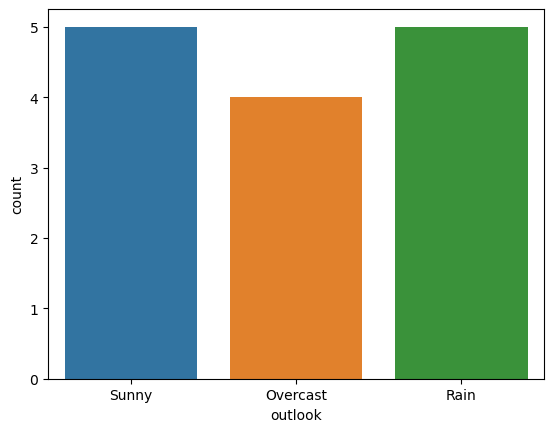

In [5]:
sb.countplot(df.outlook)

In [ ]:
## frequency table on temp

In [6]:
c=df.temp.value_counts()
c

Mild    6
Hot     4
Cool    4
Name: temp, dtype: int64

In [7]:
pd.DataFrame(c)

,temp
Mild,6
Hot,4
Cool,4


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp', ylabel='count'>

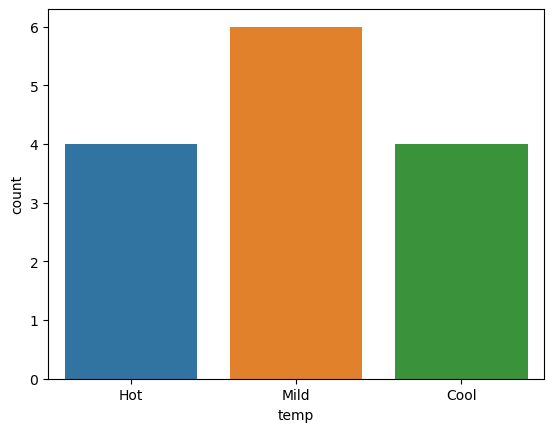

In [8]:
sb.countplot(df.temp)

In [ ]:
## frequency table on humidity

In [9]:
c=df.humidity.value_counts()
c

High      7
Normal    7
Name: humidity, dtype: int64

In [10]:
pd.DataFrame(c)

,humidity
High,7
Normal,7


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='humidity', ylabel='count'>

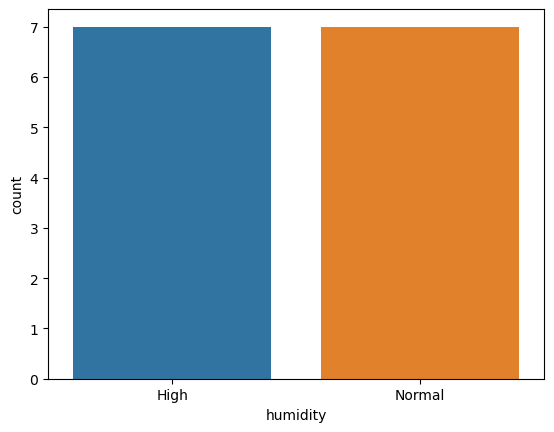

In [11]:
sb.countplot(df.humidity)

In [ ]:
## frequency table on wind

In [12]:
c=df.wind.value_counts()
c

Weak      8
Strong    6
Name: wind, dtype: int64

In [13]:
pd.DataFrame(c)

,wind
Weak,8
Strong,6


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wind', ylabel='count'>

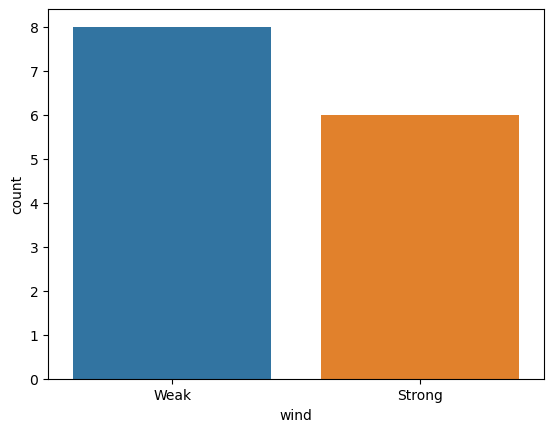

In [14]:
sb.countplot(df.wind)

## Data preprocessing

In [ ]:
# missing value analysis

In [15]:
df.isnull().sum()    # no missing values

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

In [ ]:
## feature encoding

In [16]:
df["play"]=df.play.replace({"Yes":0,"No":1})

In [17]:
df=df.drop("day",axis=1)

## split and divide data

In [18]:
x=df.drop("play",axis=1)
y=df["play"]

In [20]:
# feature encoding on x

In [21]:
x=pd.get_dummies(x)

In [22]:
x

,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


In [ ]:
# spltiing to train and test

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=0)

## apply naive bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb

GaussianNB()

In [40]:
gnb.fit(x_train,y_train)

GaussianNB()

In [41]:
pred=gnb.predict(x_test)
pred

array([1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.7142857142857143